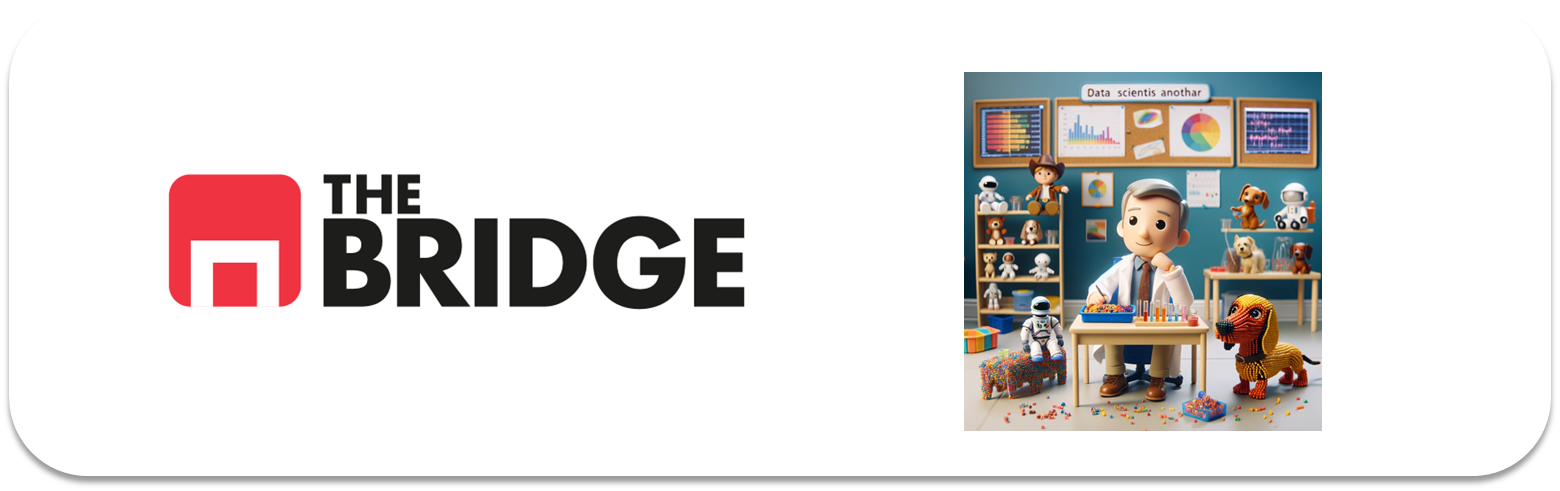

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df_titanic=sns.load_dataset("titanic")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [6]:
porcentaje_nulls = df_titanic.isnull().mean() * 100
print(porcentaje_nulls)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [7]:
df=df_titanic.copy()

# Reemplazar nulos en la columna 'age' con la media por qur tiene un 20% ed valores nulos
df['age'].fillna(df['age'].mean(), inplace=True)

# Reemplazar nulos en las columnas categóricas 'embarked' y 'embarked_town' con la moda
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Eliminar las columnas 'deck' y 'parch' una no la usamos la optra tien muchos nulos y no va ser representativa
df.drop(columns=['deck', 'parch'], inplace=True)

# Verificar el resultado
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB
None


C:\Users\María Moya\AppData\Local\Temp\ipykernel_29952\3605986435.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\María Moya\AppData\Local\Temp\ipykernel_29952\3605986435.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


| Columna/Variable | Descripción                     |
| ----------------- | ------------------------------- |
| supervivientes    | categórica nominal             |
| pclass            | categórica ordinal             |
| sex               | categórica nominal             |
| age               | numérica discreta              |
| sibsp             | numérica discreta              |
| fare              | numérica continua              |
| embarked          | categórica nominal             |
| class             | categórica ordinal             |
| who               | categórica nominal             |
| adult_male        | categórica nominal binaria     |
| embark_town       | categórica nominal             |
| alive             | categórica nominal binaria     |
| alone             | categórica nominal binaria     |


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [8]:
# Reemplazar los valores en la columna 'embark'
df['embarked'] = df['embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherburgo',
    'Q': 'Queenstown'
})

# Verificar los cambios
print(df['embarked'].unique())

['Southampton' 'Cherburgo' 'Queenstown']


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### Analisis univariente ¿qué analizar?
Para realizar el análisis univariable, comenzamos tipificando las variables del conjunto de datos, identificando cuáles eran categóricas, cuáles eran numéricas y clasificando las categóricas en nominales u ordinales según su naturaleza. Esta diferenciación nos permitió decidir qué técnicas y métricas utilizar en cada caso

In [10]:
#primero obtenemos la cardinalidad para que con las descripciones nos ayude a saber que tenemos qeu estudiar, y en que nos tenemos que fijar
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                    1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,89,9.988777,float64
sibsp,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,category
who,3,0.3367,object
adult_male,2,0.224467,bool


### #2.1 Categóricas

### Analisis frecuencias
Variables categóricas seleccionadas fueron Survived, Pclass, Sex, Embarked, Adult, y Alone, por su relevancia en el análisis y su carácter discreto o categórico.

En el análisis de las categóricas, calculamos primero las frecuencias centrales (media, mediana y moda) para cada variable. También generamos un índice categórico que facilitó la identificación de los valores más repetidos, y a partir de ello, obtuvimos las modas: por ejemplo, la mayoría de los pasajeros no sobrevivieron (Survived=0), viajaban en tercera clase (Pclass=3) y embarcaron en Southampton (Embarked=S).

In [11]:
df.describe().loc["mean"]

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
fare        32.204208
Name: mean, dtype: float64

In [12]:
df.describe().loc["50%"]

survived     0.000000
pclass       3.000000
age         29.699118
sibsp        0.000000
fare        14.454200
Name: 50%, dtype: float64

In [13]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [14]:
categoricas_df=['survived', 'pclass', 'sex', 'embarked', 'adult_male', 'alive', 'alone']
categoricas_df

['survived', 'pclass', 'sex', 'embarked', 'adult_male', 'alive', 'alone']

In [15]:
df[categoricas_df].mode().T

,0
survived,0
pclass,3
sex,male
embarked,Southampton
adult_male,True
alive,no
alone,True


### Analisis frecuencias absolutas y relativas
Analizamos las frecuencias absolutas y relativas, representando gráficamente la distribución de cada categoría para comprender mejor la composición del conjunto de datos.

In [16]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

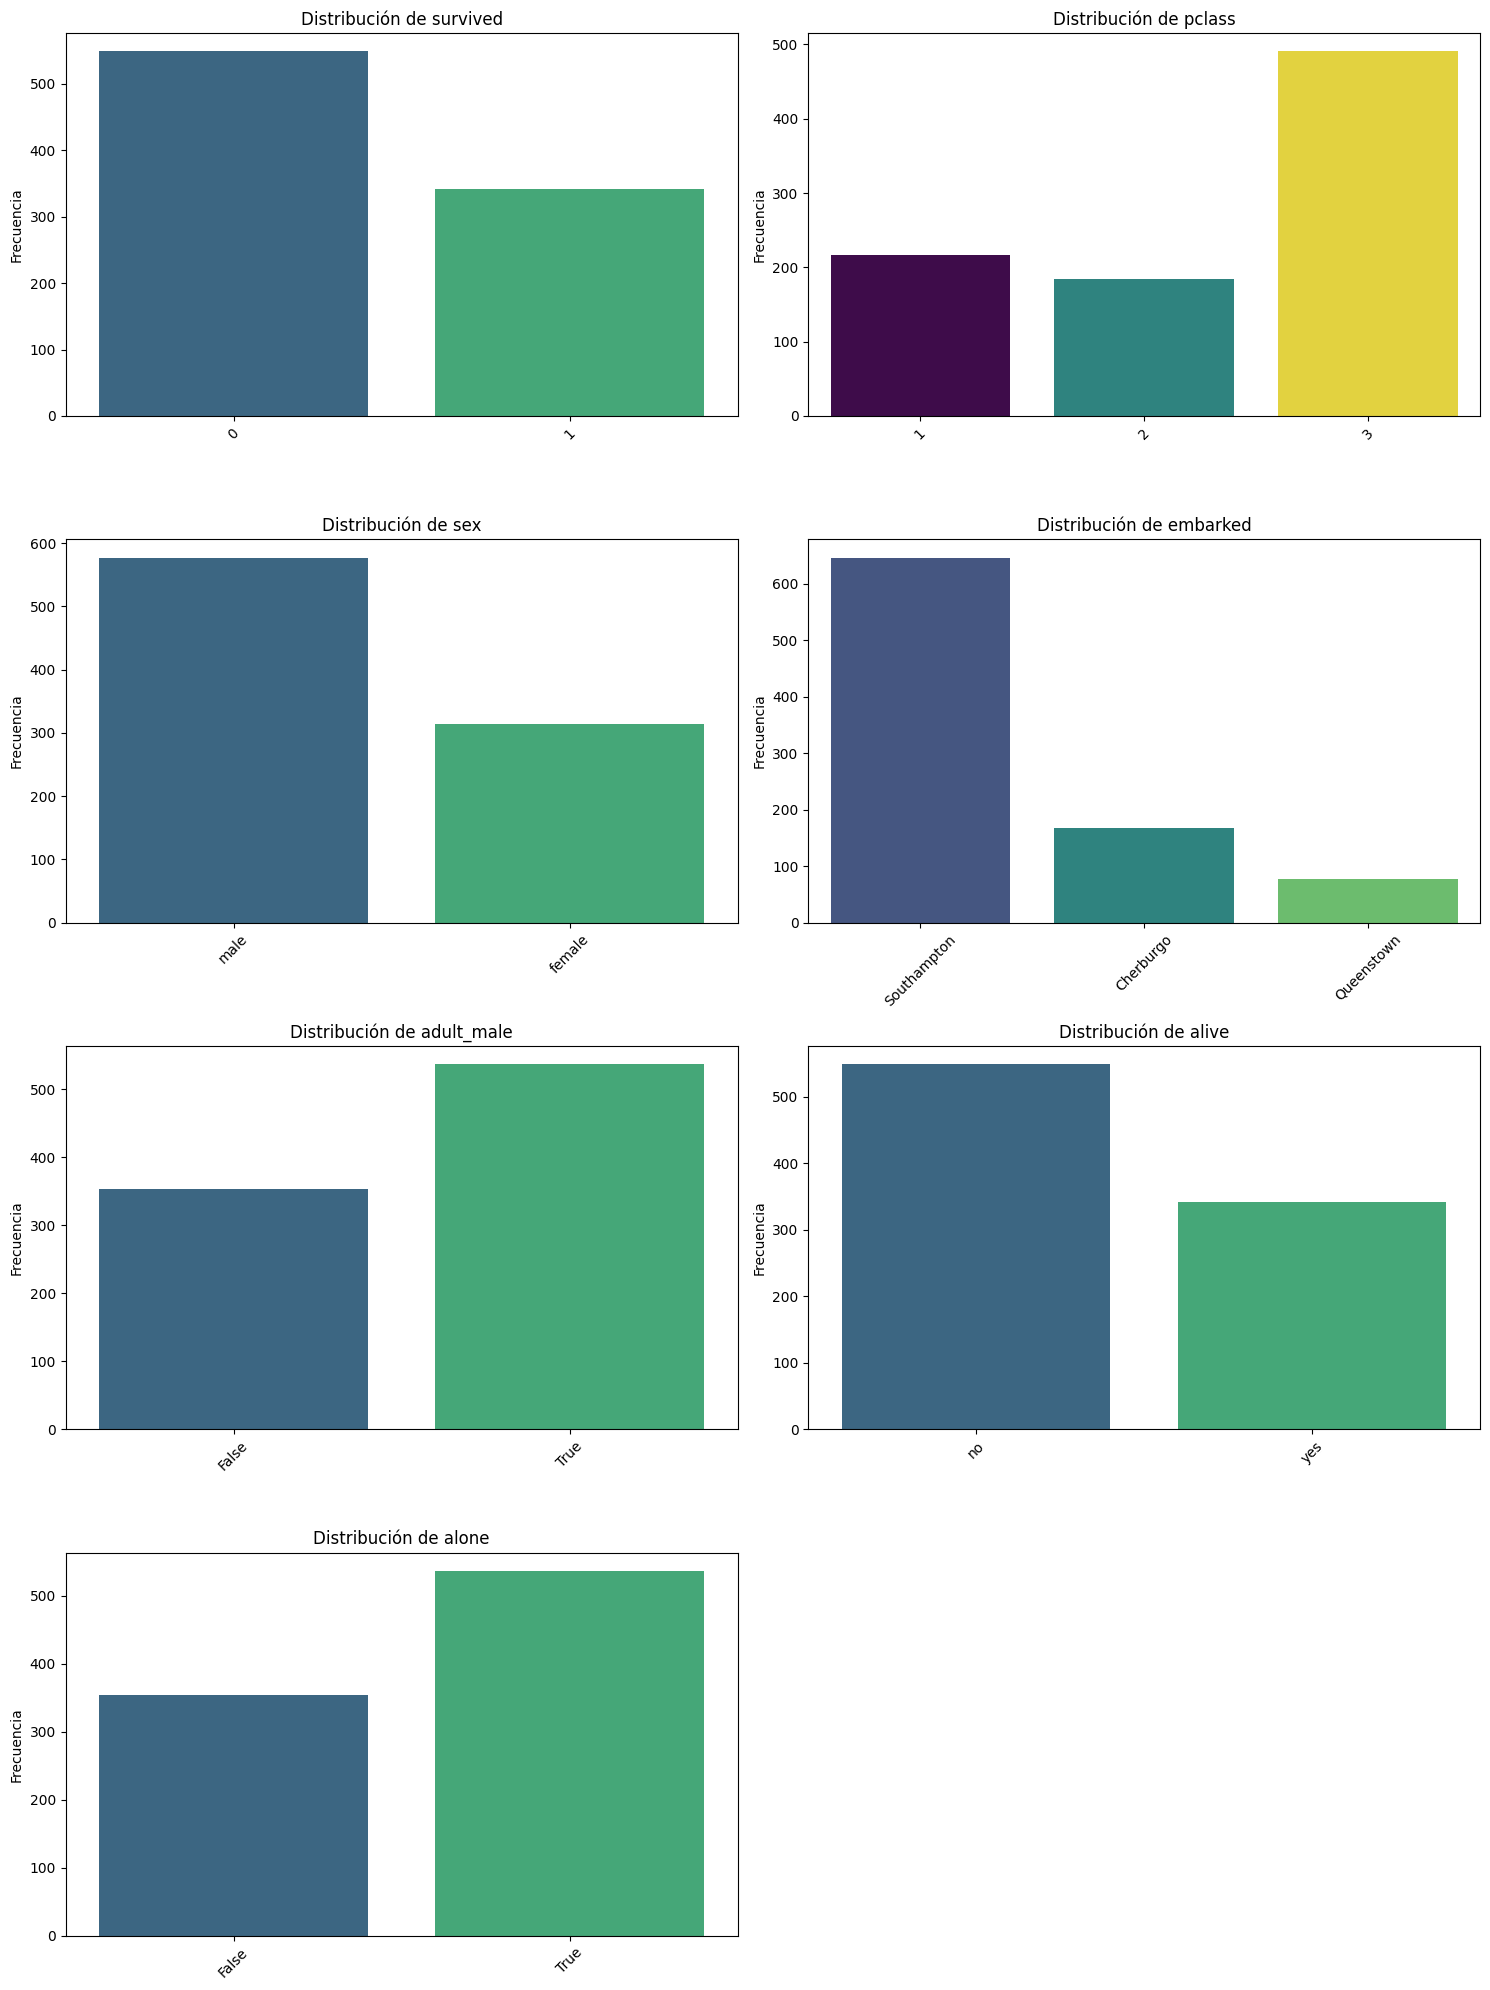

In [17]:
pinta_distribucion_categoricas(df,categoricas_df)

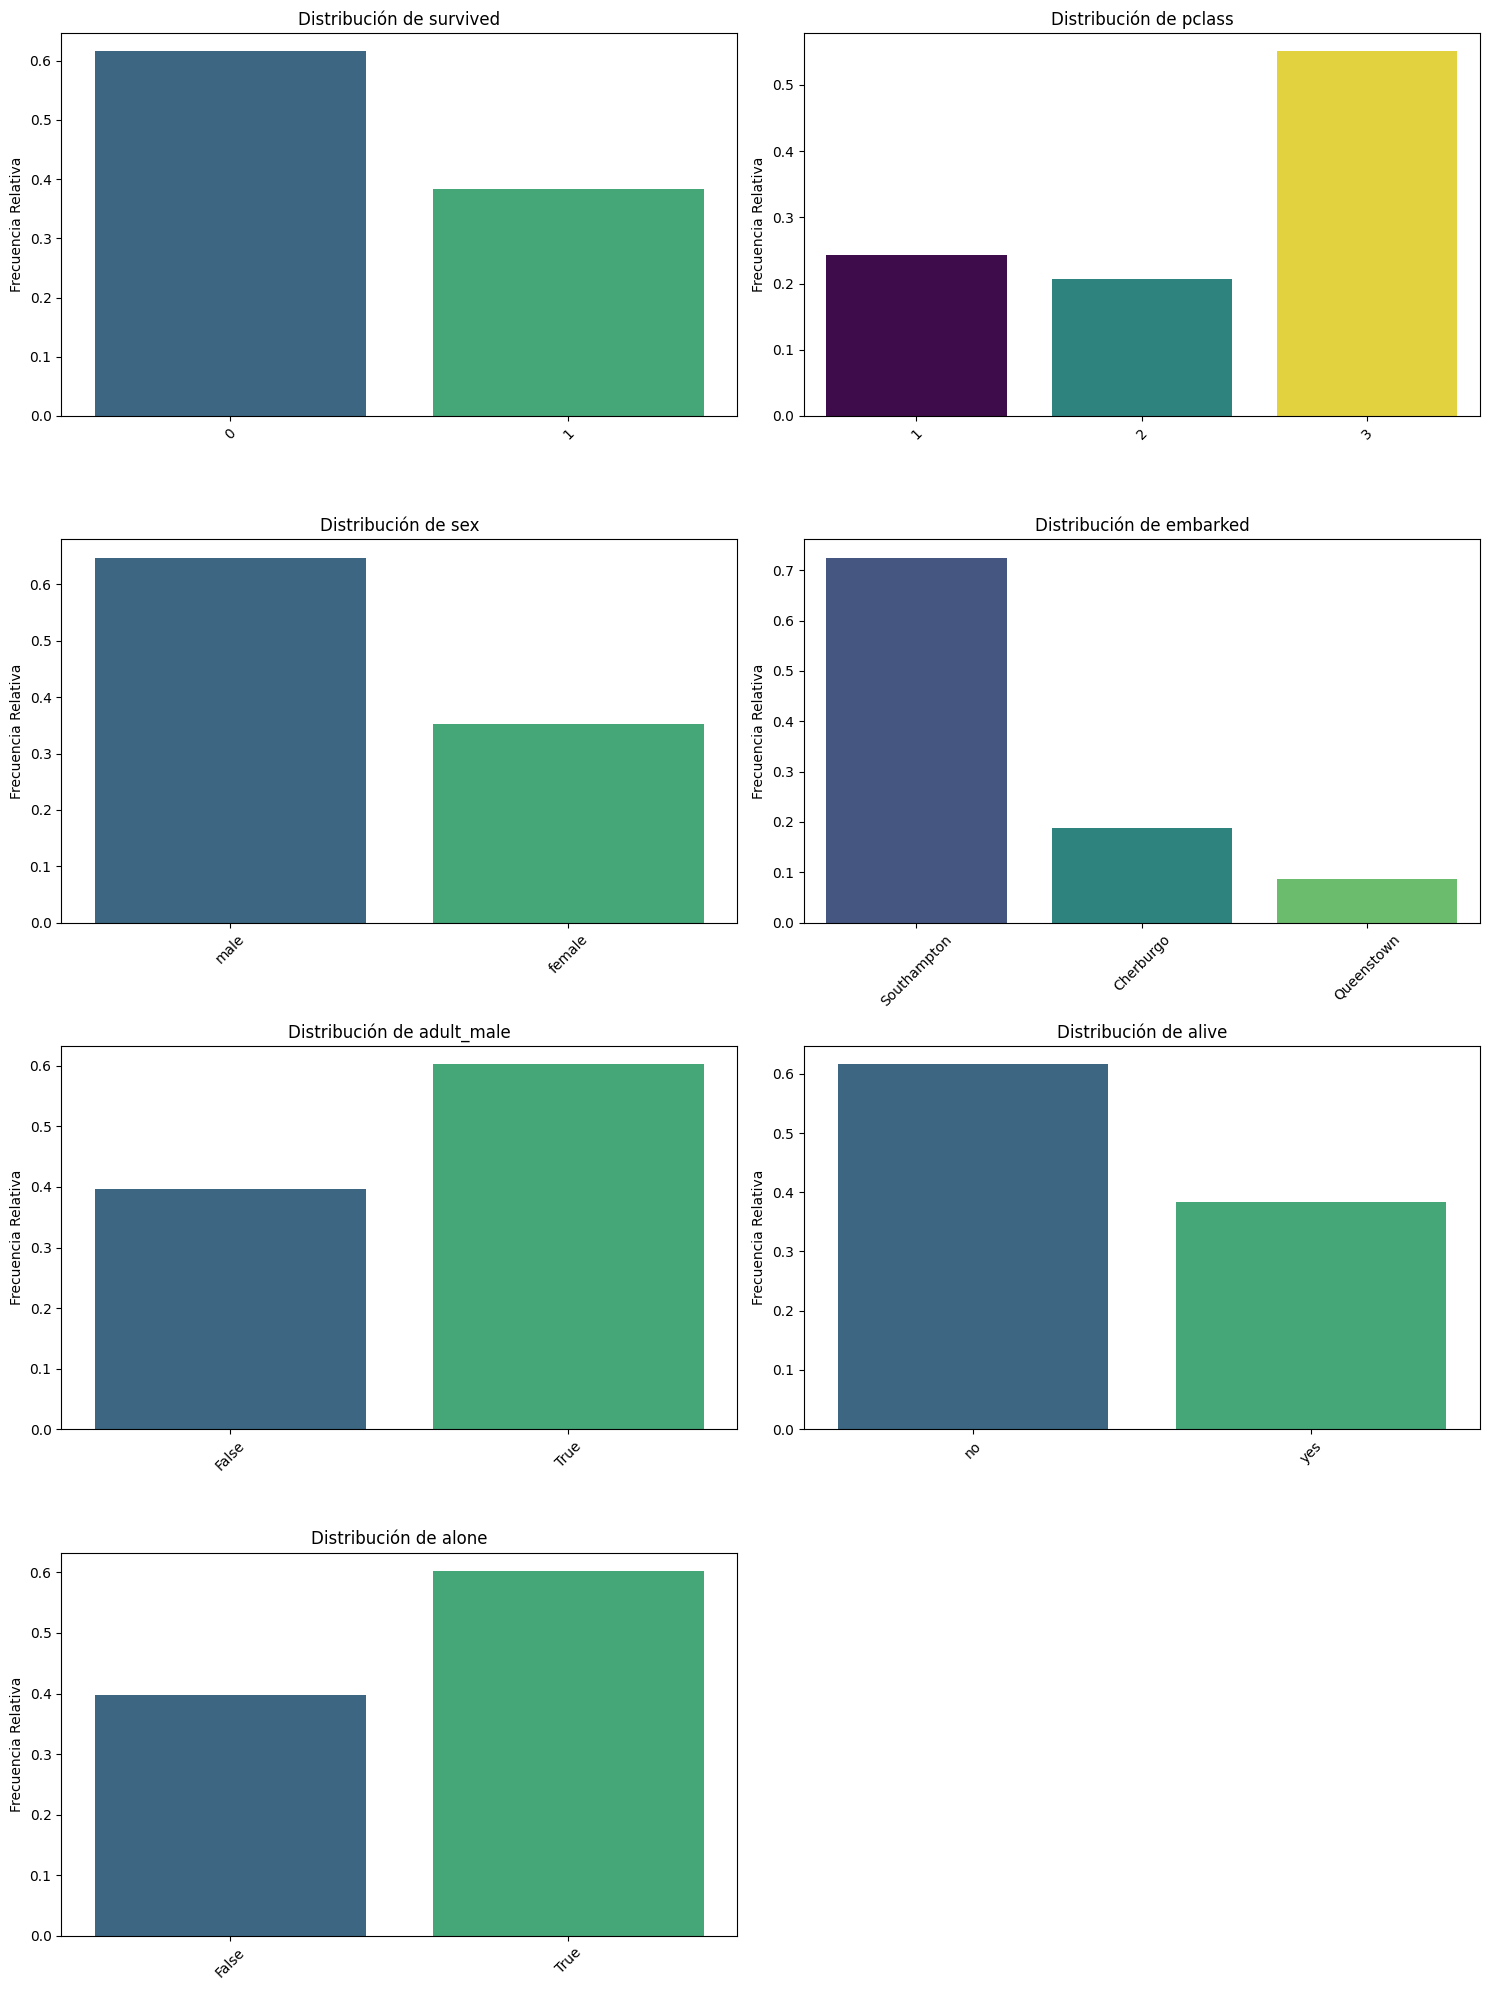

In [18]:
pinta_distribucion_categoricas(df,categoricas_df, relativa=True)

### Conclusiones Análisis categórico
Tras el análisis, se observaron patrones claros: la mayoría de los pasajeros provenían de Southampton, viajaban solos y no sobrevivieron. Los hombres eran mayoría entre los fallecidos, aunque proporcionalmente murieron más mujeres. Además, los pasajeros de tercera clase y los adultos representaban las categorías más numerosas entre los fallecidos. Estos resultados refuerzan la hipótesis de que factores como la clase social y el género tuvieron un peso significativo en las tasas de supervivencia, datos que servirán de base para análisis posteriores.

### #2.2 Numéricas

In [20]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

### Genérico variables numericas
En este describe podemos ver que contamos en general con 891 valores, ya queda muy referenciada la edad media como de entre 30 a 35 años, luego en el histograma veremos que ese valor es el mayor, casi la mayoria de los viajeros se encontraban entorno a esas edad, el numero maximo de acompañantes es de 8 aunque en su mayoria viajaban solos, y el precio esta claramente dieferenciado muchas gente pago mucho dinero como un ticket estandar, tenia un precio caro sin embargo muchos otros pagaron un precio mas bajo pero diferente

In [21]:
df.describe()

,survived,pclass,age,sibsp,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,13.002015,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


### Analisis rango intercuartilico
1. Edad: La distribución de edades muestra que la mayoría de los pasajeros eran adultos jóvenes, con una moda en 30 años. El rango intercuartílico (13) es estrecho, indicando poca dispersión en las edades centrales. La media (29) y la mediana están alineadas, lo que sugiere una distribución bastante simétrica en torno a los 30 años. Aunque fuera de los 55 se pueden apreciar como outliers, ayq ue hay varias personas hasta los 80 años.
2. Fare (precio del billete): El precio del billete tiene una distribución sesgada hacia valores altos, con algunos precios extremadamente caros que elevan la media (32) frente a la mediana (14.45). El rango intercuartílico (23) refleja una dispersión moderada entre los precios. Esto evidencia desigualdades económicas a bordo.
3. SibSp (acompañantes): La mayoría de los pasajeros viajaban solos. El rango intercuartílico (1) y la media (0.5) refuerzan que viajar sin familiares cercanos era lo más común. Muy pocos pasajeros viajaron con grupos grandes (máximo 8), siendo estas excepciones.

In [22]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [23]:
get_IQR(df,"age")

np.float64(13.0)

In [24]:
get_IQR(df,"fare")

np.float64(23.0896)

In [25]:
get_IQR(df,"sibsp")

np.float64(1.0)

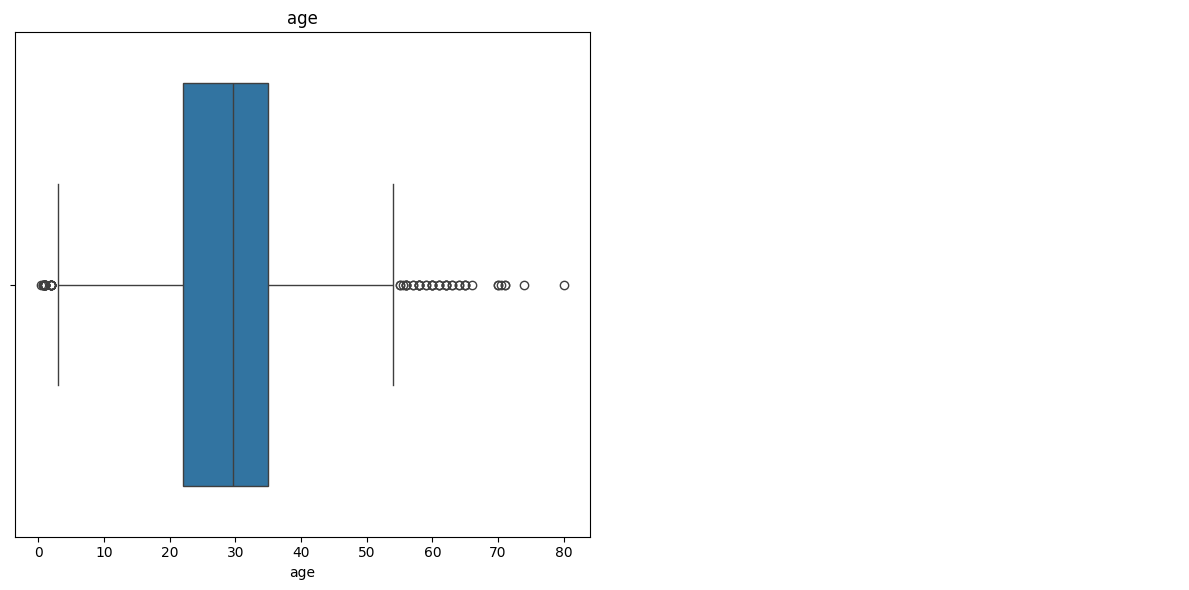

In [26]:
plot_multiple_boxplots(df, ["age"])

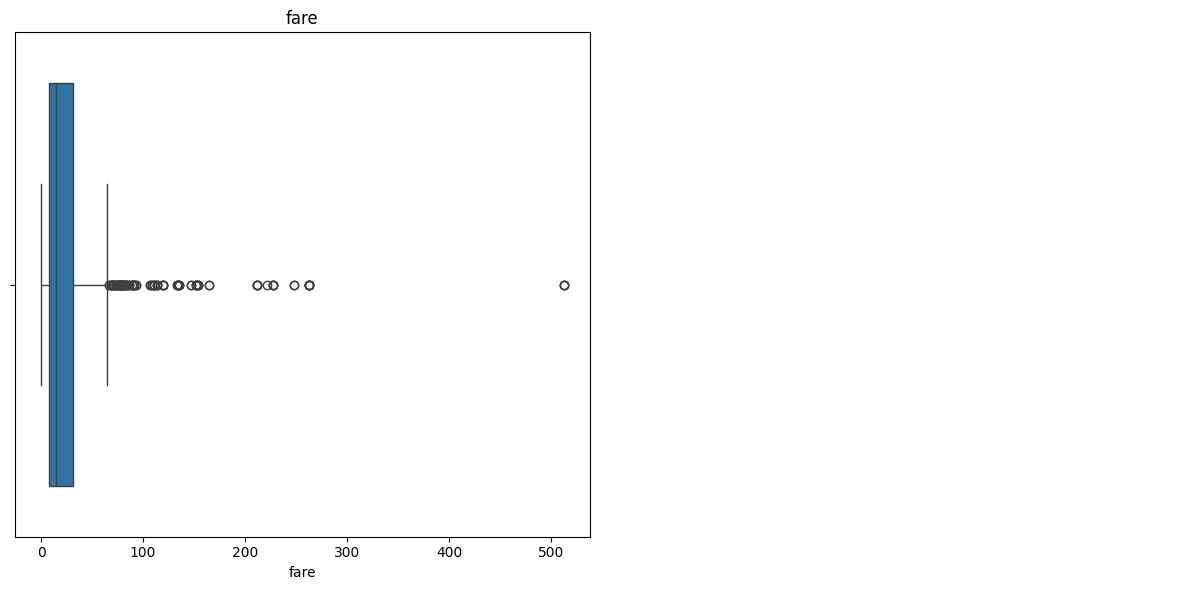

In [27]:
plot_multiple_boxplots(df, ["fare"])

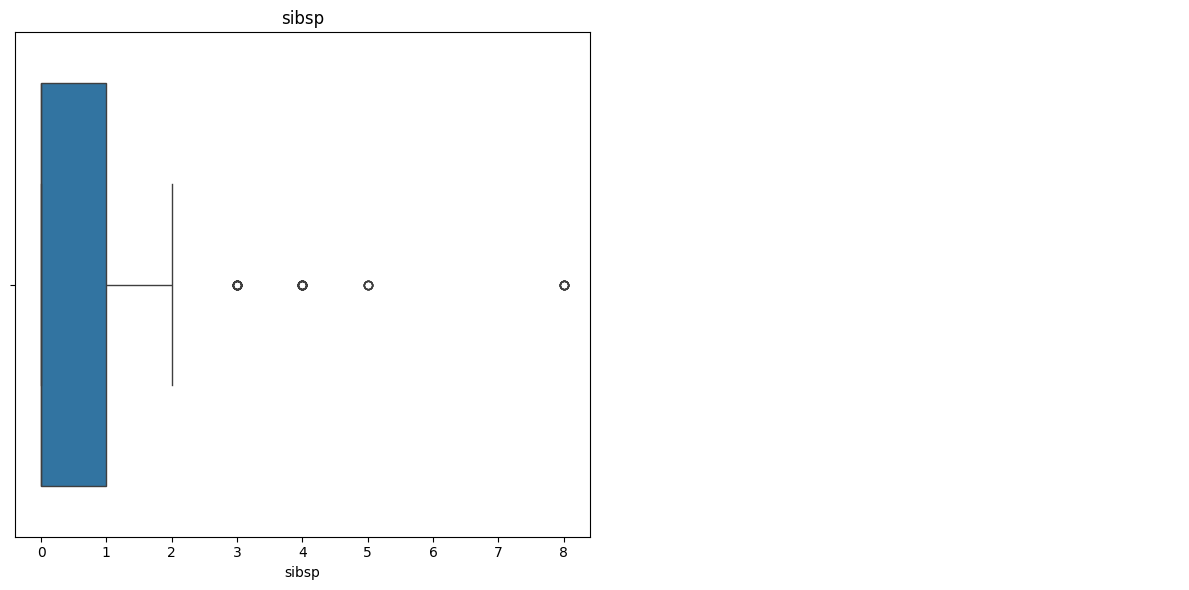

In [28]:
plot_multiple_boxplots(df, ["sibsp"])

### Analisis coeficiente de variacion
El análisis del CV muestra que las variables con mayor variabilidad relativa son sibsp y Fare, lo que destaca la heterogeneidad en el número de acompañantes y en los precios de los billetes. Por otro lado, variables como clase y edad tienen menor dispersión relativa, indicando distribuciones más homogéneas. Finalmente, la alta variabilidad en supervivientes refleja la desigualdad en las probabilidades de sobrevivir.

In [29]:
df.describe().loc[["std","mean"]].T

,std,mean
survived,0.486592,0.383838
pclass,0.836071,2.308642
age,13.002015,29.699118
sibsp,1.102743,0.523008
fare,49.693429,32.204208


In [30]:
def variabilidad(df):
    df_var=df.describe().loc[["std","mean"]].T
    df_var["CV"]=df_var["std"]/df_var["mean"]
    return df_var
    

In [31]:
#excepto para pclass que no tiene mucha variabilidad en los demas casos habria que analizar la distribucion de valores ya que tiene un CV por encima de 30
variabilidad(df)

,std,mean,CV
survived,0.486592,0.383838,1.267701
pclass,0.836071,2.308642,0.362149
age,13.002015,29.699118,0.437791
sibsp,1.102743,0.523008,2.108464
fare,49.693429,32.204208,1.543073


### Analisis corroborado con histogramas y el rango
Con ayuda de estos histogramas hemos podido corroborar que la media de edad esta entorno a 30 35 años se puede observar que un gran numero de personas pago un precio elevado por el pasaje sin embargo hubos muchas personas que pagaron un precio inferior pero claramente este precio no era estandarizado que casi todo el mundo viajo solo por que el valor 0 esta disparado y en algun caso excepcional con hasta 8 personas

In [32]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

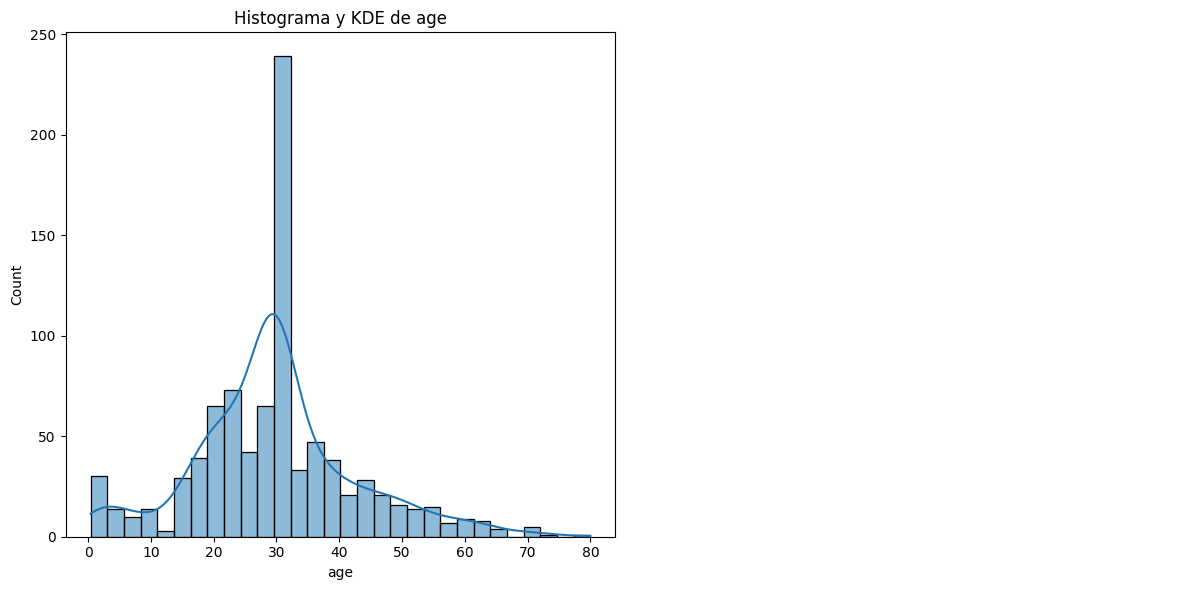

In [33]:
plot_histo_den(df,["age"])

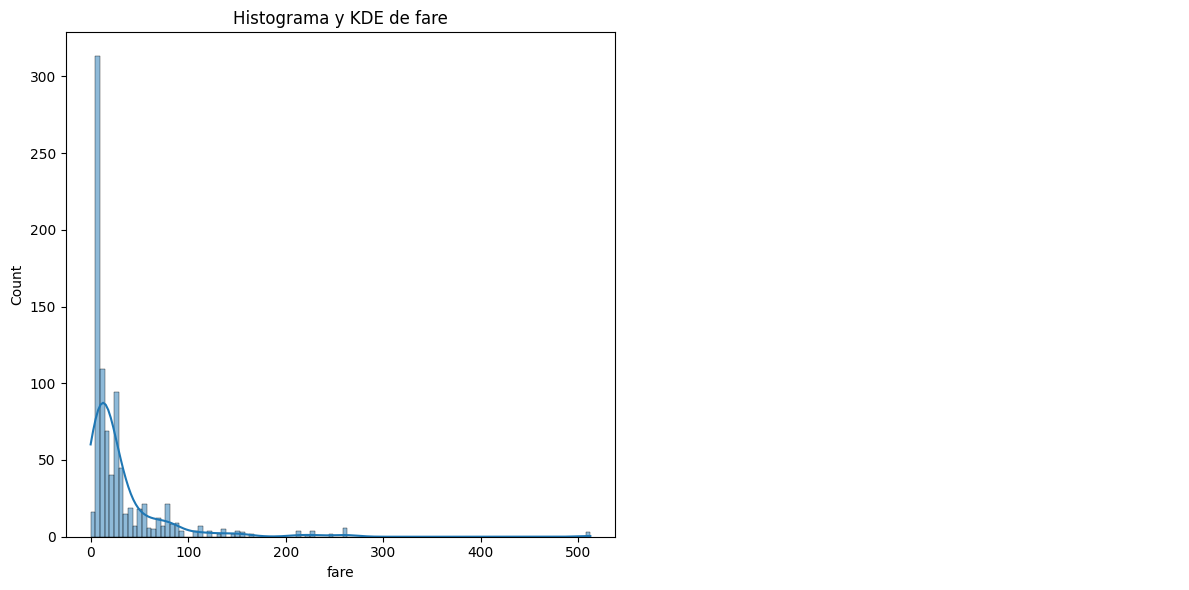

In [34]:
plot_histo_den(df,["fare"])

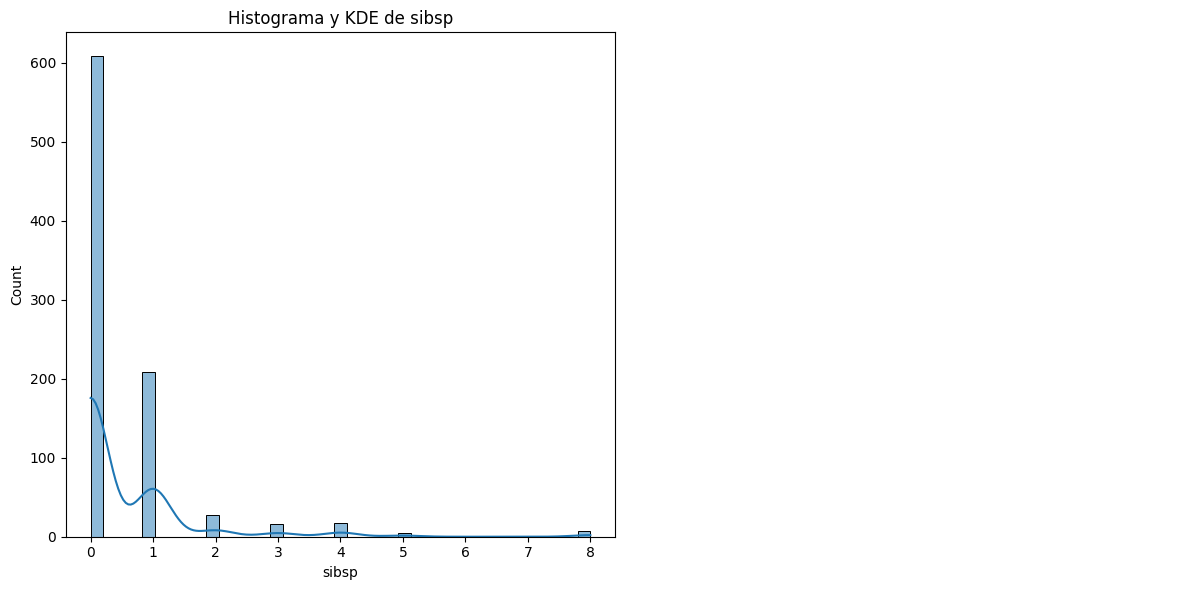

In [35]:
plot_histo_den(df,["sibsp"])

In [36]:
df.describe().loc["max"] - df.describe().loc["min"]

survived      1.0000
pclass        2.0000
age          79.5800
sibsp         8.0000
fare        512.3292
dtype: float64

### Conclusión general del análisis
El análisis univariable revela que la mayoría de los pasajeros no sobrevivieron, en torno a un 62%, según muestran los gráficos, destacando una clara desigualdad según ciertas características específicas. Los pasajeros de tercera clase, los hombres (quizá porque eran más) y los que embarcaron en Southampton (posiblemente debido a que embarcó mucha más gente allí) tuvieron tasas de mortalidad más altas.

En cuanto a las variables numéricas, la mayoría de los pasajeros tenían entre 30 y 35 años, y había pocos mayores de 55. El precio de los billetes refleja una tendencia: los pasajeros que pagaron precios más altos tuvieron mayor probabilidad de sobrevivir, lo cual podría ser objeto de estudio.

Este análisis univariante identifica patrones clave relacionados con la mortalidad, destacando la influencia de la clase social, el género y la edad. Sin embargo, para profundizar en estas relaciones será necesario realizar un análisis más complejo.